In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describeribe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated().sum()

0

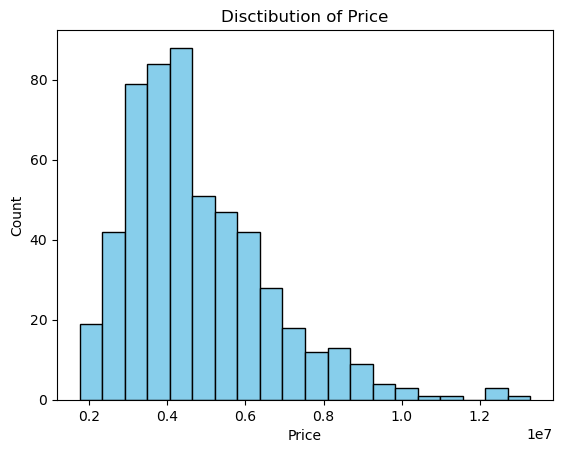

In [9]:
plt.hist(df['price'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Disctibution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [10]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [11]:
df.groupby('furnishingstatus')['price'].mean()

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64

In [12]:
df.sort_values(by='area', ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished


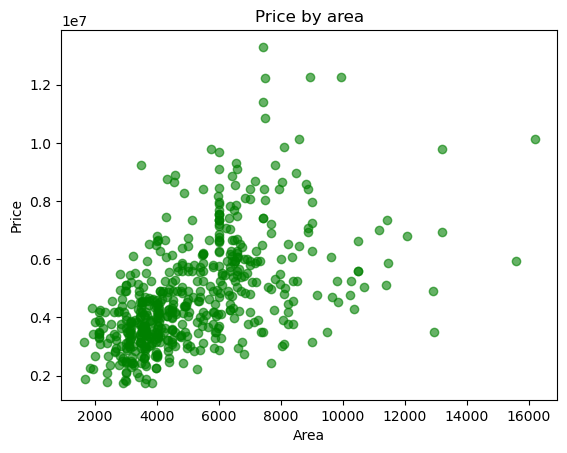

In [13]:
plt.scatter(df['area'], df['price'], color='green', alpha=0.6)
plt.title('Price by area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

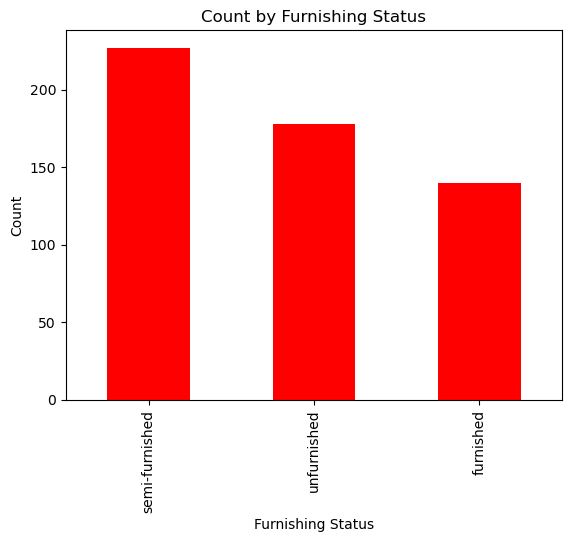

In [14]:
df['furnishingstatus'].value_counts().plot(kind='bar', color='red')
plt.title('Count by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

In [15]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [16]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [17]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

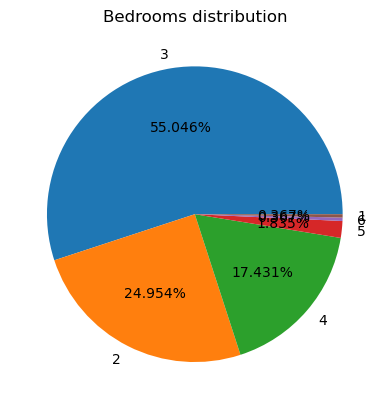

In [19]:
df['bedrooms'].value_counts().plot(kind='pie', autopct='%2.3f%%')
plt.title('Bedrooms distribution')
plt.ylabel('')
plt.show()

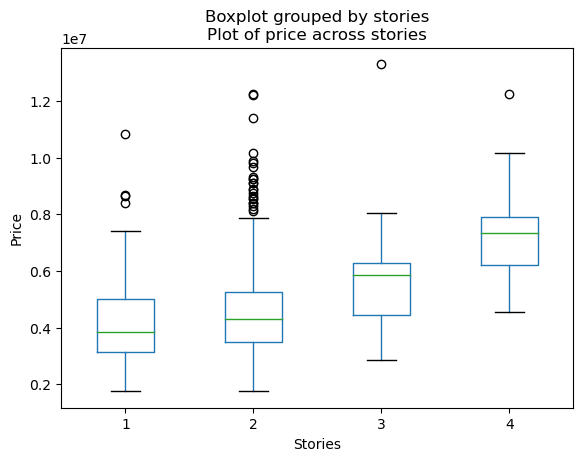

In [20]:
df.boxplot(column='price', by='stories', grid=False)
plt.title('Plot of price across stories')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()

In [21]:
df.groupby('guestroom')['price'].mean()

guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

In [22]:
df.groupby('basement')['area'].max()

basement
no     16200
yes    13200
Name: area, dtype: int64

In [23]:
df.groupby('airconditioning')['price'].median()

airconditioning
no     3885000.0
yes    5757500.0
Name: price, dtype: float64

In [24]:
df.groupby('mainroad')['price'].min()

mainroad
no     1750000
yes    1750000
Name: price, dtype: int64

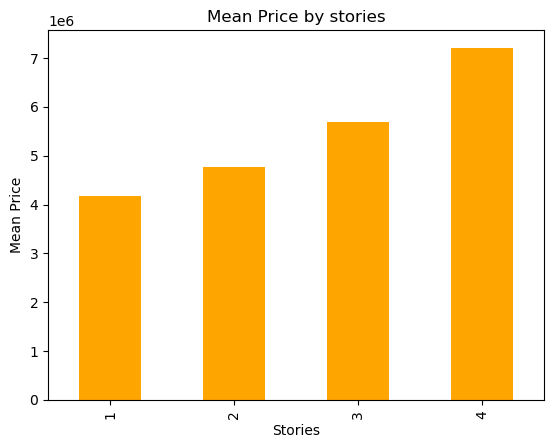

In [25]:
df.groupby('stories')['price'].mean().plot(kind='bar', color='orange')
plt.title('Mean Price by stories')
plt.xlabel('Stories')
plt.ylabel('Mean Price')
plt.show()

In [26]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [27]:
# Linear Regression Model

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df['mainroad'] = labelencoder.fit_transform(df['mainroad'])
df['guestroom'] = labelencoder.fit_transform(df['guestroom'])
df['basement'] = labelencoder.fit_transform(df['basement'])
df['hotwaterheating'] = labelencoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = labelencoder.fit_transform(df['airconditioning'])
df['prefarea'] = labelencoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = labelencoder.fit_transform(df['furnishingstatus'])

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [29]:
X = df.iloc[:, 1:]
Y = df['price']

In [30]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [32]:
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def modelResults(predictions):
    print('Mean absolute error on the model is: {}'.format(mean_absolute_error(Y_test, predictions)))
    print('Mean squared error on the model is: {}'.format(np.sqrt(mean_squared_error(Y_test, predictions))))

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train, Y_train)
preds_lr = lr.predict(scaled_X_test)
modelResults(preds_lr)

Mean absolute error on the model is: 848276.276704433
Mean squared error on the model is: 1122079.2685310012


In [37]:
# Support Vector Model

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()

In [38]:
param_grid_svr = {'C': [0.01, 0.1, 0.5, 1],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto'],
                  'degree': [2, 3, 4, 5]}

In [39]:
gridsvr = GridSearchCV(svr, param_grid_svr)

In [40]:
gridsvr.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [41]:
gridsvr.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [42]:
preds_svr = gridsvr.predict(scaled_X_test)

In [43]:
modelResults(preds_svr)

Mean absolute error on the model is: 1355379.9988937627
Mean squared error on the model is: 1797814.0378440344


In [44]:
# XGBoost Model

from xgboost import XGBRegressor
xgb = XGBRegressor()

In [46]:
param_grid_xgb = {'n_estimators': [50, 100, 500, 1000, 2000],
                 'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                 'max_depth': [3, 5, 7, 9]}

In [47]:
# Tree based models do not need to be fitted with scaled data, so we can use unscaled data

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv = 5)
grid_search_xgb.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 500, 1000, 2000]})

In [48]:
grid_search_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

In [50]:
preds_xgb = grid_search_xgb.predict(X_test)

In [51]:
modelResults(preds_xgb)

Mean absolute error on the model is: 786076.3073394495
Mean squared error on the model is: 1107560.3359011065
